In [5]:
import numpy as np
from matplotlib import pyplot as plt
from ripe.atlas.cousteau import ProbeRequest, AtlasResultsRequest
from ripe.atlas.sagan import  TracerouteResult
import requests
import json
filters = {"tags": "system-anchor,system-ipv4-stable-90d,system-ipv6-stable-90d", "country_code": "NL",  "is_public":"True"}
probes = ProbeRequest(**filters)
list_probes = []
for probe in probes:
    list_probes += [probe["id"]]
list_ips = []
for i in range(104):
    kwargs = {
        "msm_id":85848140+i,
        "probe_ids": list_probes
    }

    is_success, results = AtlasResultsRequest(**kwargs).create()

    if is_success:
        for result in results:
            res = TracerouteResult(result)
            if(res.is_success):
                x = "success"
                print(res.ip_path)
                print(res.destination_name)
                print(res.destination_address)
                print(res.destination_ip_responded)
                # list_ips.append(res.destination_address)
                # print("success")
            else:
                list_ips.append(res.destination_address)
                # print("no_succes")
                # print(res.source_address)
                # print(res.destination_name)
            # res.
        print("hallo")
    else:
        print("Error loading request.")
        print(results)


def get_json_data(ip:str):
    # URL for the API request
    url = "https://stat.ripe.net/data/rir-stats-country/data.json?resource=" + ip

    # Send the GET request to the specified URL
    response = requests.get(url)

    # Check if the request was successful (HTTP status code 200)
    if response.status_code == 200:
        # Parse the response JSON data
        data = response.json()

        # Optionally, print the JSON data (pretty-printed)
        # print(json.dumps(data, indent=4))

        return data
    else:
        print(f"Error: Unable to fetch data. HTTP Status code: {response.status_code}")
        return None


hallo
hallo
[['195.246.236.61', '195.246.236.61', '195.246.236.61'], ['37.203.56.80', '37.203.56.80', '37.203.56.80'], [None, None, None], [None, None, None], [None, None, None], ['80.249.208.188', '80.249.208.188', '80.249.208.188'], ['80.249.210.217', '80.249.210.217', '80.249.210.217'], [None, None, None], ['199.7.83.42', '199.7.83.42', '199.7.83.42']]
login-select.defriesland.nl
76.223.71.132
False
hallo
hallo
hallo
hallo
[[None, '185.15.59.150', '185.15.59.150'], ['185.15.59.150', '185.15.59.150', '185.15.59.150', '193.239.118.152', '185.15.59.150'], ['193.239.118.152', '193.239.118.152', '213.130.29.162'], ['213.130.29.162', '213.130.29.162', '213.130.29.8'], ['213.130.29.8', '213.130.29.8', '199.7.83.42'], ['199.7.83.42', '199.7.83.42', None]]
login-select.fbto.nl
13.248.206.174
False
hallo
hallo
hallo
hallo
[['87.195.79.81', '87.195.79.81', '87.195.79.81'], ['212.45.33.13', '212.45.33.13', '212.45.33.13'], ['212.45.33.16', '212.45.33.16', '212.45.33.16'], ['212.45.44.145', '212

hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo
hallo


In [6]:
from collections import Counter

# print(get_json_data())
data = get_json_data("2001:67c:2e8::/48")
dns_register = dict(Counter([ get_json_data(ip)['data']['located_resources'][0]['location'] for ip in list_ips]))

In [7]:
print(dns_register.keys())

dict_keys(['US', 'NL', 'IE'])


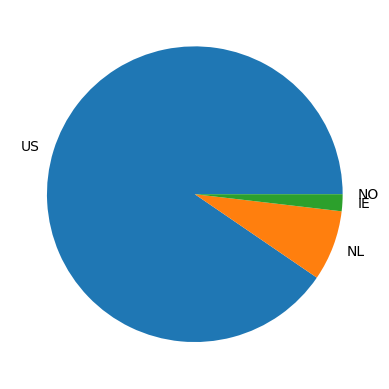

In [16]:
# print([ get_json_data(ip)['data']['located_resources'][0]['location'] for ip in list_ips])
# print(data['data']['located_resources'][0]['location'])
y = np.array([dns_register[x] for x in dns_register.keys()])
mylabels = dns_register.keys()

plt.pie(y, labels = mylabels)
plt.show()
# https://stat.ripe.net/docs/02.data-api/rir-stats-country.html
# How to find the country https://stat.ripe.net/data/rir-stats-country/data.json?resource=2001:67c:2e8::/48


In [12]:
resource_register = dict(Counter([ get_json_data(ip)['data']['located_resources'][0]['resource'].split('/')[1] for ip in list_ips]))

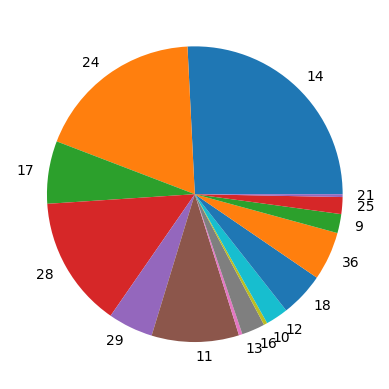

In [15]:
y = np.array([resource_register[x] for x in resource_register.keys()])
mylabels = resource_register.keys()

plt.pie(y, labels = mylabels)
plt.show()